AI and Blockchain Test Notebook for CNN Structures

Testing 1, 2, and 3-layer CNNs

In [ ]:
!pip install imbalanced-learn
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import utils

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization

import IPython
import IPython.display

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis
Below are the steps I take to perform Exploratory Data Analysis.

#### Getting the Data

In [ ]:
# data source: fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Data Dictionary/Information

https://www.kaggle.com/datasets/jishnukoliyadan/gold-price-1979-present

### Exploring the Data

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# viewing the first few rows of the data
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

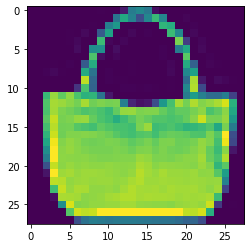

In [ ]:
# what's the data size?
plt.imshow(X_train[100])
# there are not many features, but there are plenty of examples

In [ ]:
classes = ['T-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
           'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
y_train_r = y_train.reshape(-1)
y_train_r

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_test_r = y_test.reshape(-1)
y_test_r

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

bag


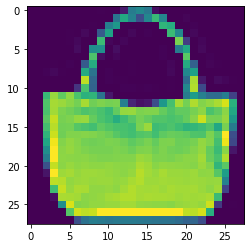

In [ ]:
def plot_img(X, y, idx):
  plt.imshow(X[idx])
  print(classes[int(y[idx])])

plot_img(X_train, y_train, 100)

In [ ]:
X = np.concatenate((X_train, X_test), axis = 0)

In [ ]:
X.shape

(70000, 28, 28)

In [ ]:
y = np.concatenate((y_train, y_test), axis = 0)

In [ ]:
y.shape

(70000,)

In [ ]:
X_shuffle, y_shuffle = utils.shuffle(X, y)

trouser


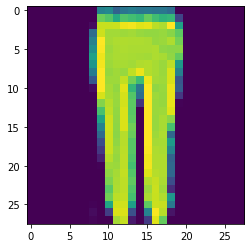

In [ ]:
plot_img(X_shuffle, y_shuffle, 34525)

In [ ]:
X_train_s, X_test_set, y_train_s, y_test_set = train_test_split(X_shuffle,
                                                            y_shuffle,
                                                            test_size = 0.1,
                                                            random_state = 42)

In [ ]:
X_train_set, X_val_set, y_train_set, y_val_set = train_test_split(X_train_s,
                                                            y_train_s,
                                                            test_size = 0.11111,
                                                            random_state = 42)

In [ ]:
denom = X_train_set.shape[0] + X_val_set.shape[0] + X_test_set.shape[0]
print('Train:', X_train_set.shape, '-', X_train_set.shape[0] / denom)
print('Val:  ', X_val_set.shape, '-', X_val_set.shape[0] / denom)
print('Test: ', X_test_set.shape, ' -', X_test_set.shape[0] / denom)

Train: (56000, 28, 28) - 0.8
Val:   (7000, 28, 28) - 0.1
Test:  (7000, 28, 28)  - 0.1


In [ ]:
X_train_norm = X_train_set / 255
X_val_norm = X_val_set / 255
X_test_norm = X_test_set / 255

In [ ]:
X_train_norm_ex = tf.expand_dims(X_train_norm, -1)
X_val_norm_ex = tf.expand_dims(X_val_norm, -1)
X_test_norm_ex = tf.expand_dims(X_test_norm, -1)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(280, 280),
])

### CNN - 1 Convolution Layer

In [ ]:
modelCNNc1 = tf.keras.models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
modelCNNc1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
historyCNNc1 = modelCNNc1.fit(X_train_norm_ex, y_train_set, epochs=100,
                      validation_data = (X_val_norm_ex, y_val_set),
                      callbacks=[early_stopping])

Epoch 1/100
1750/1750 [==============================] - 91s 46ms/step - loss: 0.5824 - accuracy: 0.8048 - val_loss: 0.3473 - val_accuracy: 0.8714
Epoch 2/100
1750/1750 [==============================] - 82s 47ms/step - loss: 0.3736 - accuracy: 0.8652 - val_loss: 0.3131 - val_accuracy: 0.8810
Epoch 3/100
1750/1750 [==============================] - 80s 46ms/step - loss: 0.3260 - accuracy: 0.8806 - val_loss: 0.2946 - val_accuracy: 0.8867
Epoch 4/100
1750/1750 [==============================] - 80s 46ms/step - loss: 0.2971 - accuracy: 0.8909 - val_loss: 0.2855 - val_accuracy: 0.8957
Epoch 5/100
1750/1750 [==============================] - 82s 47ms/step - loss: 0.2735 - accuracy: 0.8994 - val_loss: 0.2877 - val_accuracy: 0.8979
Epoch 6/100
1750/1750 [==============================] - 80s 46ms/step - loss: 0.2545 - accuracy: 0.9049 - val_loss: 0.2853 - val_accuracy: 0.8980
Epoch 7/100
1750/1750 [==============================] - 80s 46ms/step - loss: 0.2394 - accuracy: 0.9082 - val_loss: 0

In [ ]:
historyCNNc1.history

{'loss': [0.5824480056762695,
  0.3735710680484772,
  0.3260374963283539,
  0.2970655560493469,
  0.2735190987586975,
  0.2545415163040161,
  0.23938578367233276,
  0.22214704751968384],
 'accuracy': [0.8047857284545898,
  0.8651607036590576,
  0.8805714249610901,
  0.8909106850624084,
  0.899446427822113,
  0.9049107432365417,
  0.9082499742507935,
  0.9156249761581421],
 'val_loss': [0.34731197357177734,
  0.3131130039691925,
  0.29461491107940674,
  0.2855472266674042,
  0.28770408034324646,
  0.2852608263492584,
  0.29446446895599365,
  0.2939213812351227],
 'val_accuracy': [0.8714285492897034,
  0.8809999823570251,
  0.8867142796516418,
  0.895714282989502,
  0.897857129573822,
  0.8980000019073486,
  0.8981428742408752,
  0.9007142782211304]}

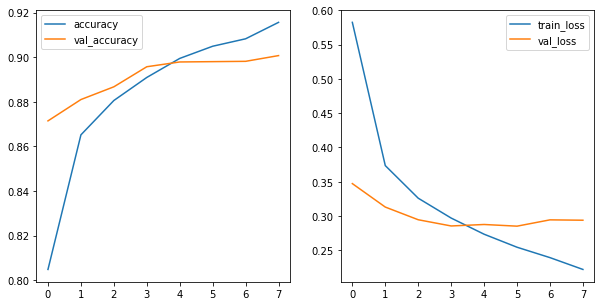

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historyCNNc1.history['accuracy'])
ax[0].plot(historyCNNc1.history['val_accuracy'])
ax[0].legend(['accuracy', 'val_accuracy'])
ax[1].plot(historyCNNc1.history['loss'])
ax[1].plot(historyCNNc1.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
modelCNNc1.evaluate(X_val_norm_ex, y_val_set)

219/219 [==============================] - 4s 16ms/step - loss: 0.2939 - accuracy: 0.9007


[0.2939213812351227, 0.9007142782211304]

In [ ]:
modelCNNc1.evaluate(X_test_norm_ex, y_test_set)

219/219 [==============================] - 4s 16ms/step - loss: 0.3214 - accuracy: 0.8964


[0.32135725021362305, 0.8964285850524902]

### CNN - 2 Convolution Layers

In [ ]:
modelCNNc2 = tf.keras.models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
modelCNNc2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
historyCNNc2 = modelCNNc2.fit(X_train_norm_ex, y_train_set, epochs=100,
                      validation_data = (X_val_norm_ex, y_val_set),
                      callbacks=[early_stopping])

Epoch 1/100
1750/1750 [==============================] - 92s 52ms/step - loss: 0.4540 - accuracy: 0.8394 - val_loss: 0.3240 - val_accuracy: 0.8787
Epoch 2/100
1750/1750 [==============================] - 91s 52ms/step - loss: 0.3139 - accuracy: 0.8846 - val_loss: 0.3069 - val_accuracy: 0.8850
Epoch 3/100
1750/1750 [==============================] - 90s 51ms/step - loss: 0.2689 - accuracy: 0.8980 - val_loss: 0.2780 - val_accuracy: 0.8924
Epoch 4/100
1750/1750 [==============================] - 91s 52ms/step - loss: 0.2327 - accuracy: 0.9118 - val_loss: 0.2814 - val_accuracy: 0.8983
Epoch 5/100
1750/1750 [==============================] - 90s 51ms/step - loss: 0.2027 - accuracy: 0.9228 - val_loss: 0.2830 - val_accuracy: 0.8977


In [ ]:
historyCNNc2.history

{'loss': [0.4540167450904846,
  0.31385642290115356,
  0.2689162790775299,
  0.23265302181243896,
  0.20270049571990967],
 'accuracy': [0.8393928408622742,
  0.8845893144607544,
  0.8980000019073486,
  0.9117500185966492,
  0.9227856993675232],
 'val_loss': [0.3239859938621521,
  0.3069170415401459,
  0.2780456244945526,
  0.2813916504383087,
  0.28299805521965027],
 'val_accuracy': [0.8787142634391785,
  0.8849999904632568,
  0.8924285769462585,
  0.8982856869697571,
  0.8977142572402954]}

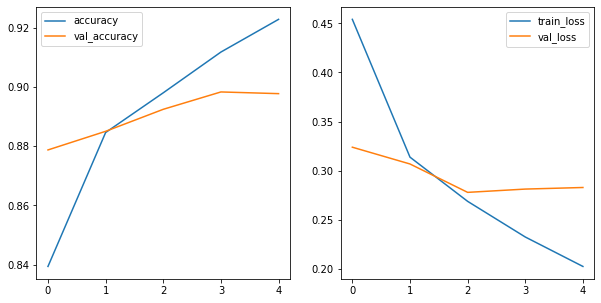

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historyCNNc2.history['accuracy'])
ax[0].plot(historyCNNc2.history['val_accuracy'])
ax[0].legend(['accuracy', 'val_accuracy'])
ax[1].plot(historyCNNc2.history['loss'])
ax[1].plot(historyCNNc2.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
modelCNNc2.evaluate(X_val_norm_ex, y_val_set)

219/219 [==============================] - 4s 20ms/step - loss: 0.2830 - accuracy: 0.8977


[0.28299805521965027, 0.8977142572402954]

In [ ]:
modelCNNc2.evaluate(X_test_norm_ex, y_test_set)

219/219 [==============================] - 4s 20ms/step - loss: 0.2966 - accuracy: 0.8956


[0.2966306805610657, 0.8955714106559753]

### CNN - 3 Convolution Layers

In [ ]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(224, 224)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [ ]:
modelCNNc3 = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
modelCNNc3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
historyCNNc3 = modelCNNc3.fit(X_train_norm_ex, y_train_set, epochs=100,
                      validation_data = (X_val_norm_ex, y_val_set),
                      callbacks=[early_stopping])

Epoch 1/100
1750/1750 [==============================] - 96s 54ms/step - loss: 0.4212 - accuracy: 0.8496 - val_loss: 0.3240 - val_accuracy: 0.8776
Epoch 2/100
1750/1750 [==============================] - 94s 54ms/step - loss: 0.2820 - accuracy: 0.8976 - val_loss: 0.2697 - val_accuracy: 0.8994
Epoch 3/100
1750/1750 [==============================] - 95s 54ms/step - loss: 0.2287 - accuracy: 0.9154 - val_loss: 0.2480 - val_accuracy: 0.9106
Epoch 4/100
1750/1750 [==============================] - 95s 54ms/step - loss: 0.1893 - accuracy: 0.9285 - val_loss: 0.2338 - val_accuracy: 0.9159
Epoch 5/100
1750/1750 [==============================] - 96s 55ms/step - loss: 0.1592 - accuracy: 0.9397 - val_loss: 0.2464 - val_accuracy: 0.9157
Epoch 6/100
1750/1750 [==============================] - 95s 54ms/step - loss: 0.1311 - accuracy: 0.9505 - val_loss: 0.2642 - val_accuracy: 0.9127


In [ ]:
historyCNNc3.history

{'loss': [0.42124661803245544,
  0.2819768190383911,
  0.2286975085735321,
  0.1893479824066162,
  0.1591668277978897,
  0.1310512274503708],
 'accuracy': [0.8496249914169312,
  0.897553563117981,
  0.9153749942779541,
  0.9284642934799194,
  0.9396607279777527,
  0.9505178332328796],
 'val_loss': [0.32400792837142944,
  0.26968294382095337,
  0.24796931445598602,
  0.23381130397319794,
  0.24635356664657593,
  0.26424896717071533],
 'val_accuracy': [0.8775714039802551,
  0.8994285464286804,
  0.9105714559555054,
  0.9158571362495422,
  0.9157142639160156,
  0.9127143025398254]}

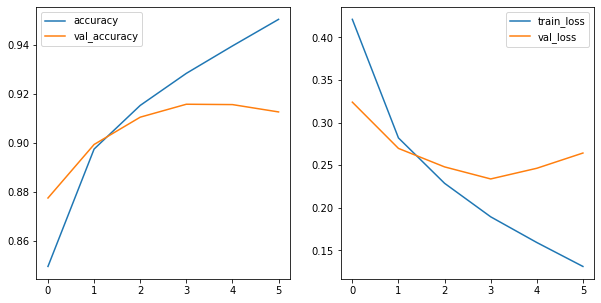

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historyCNNc3.history['accuracy'])
ax[0].plot(historyCNNc3.history['val_accuracy'])
ax[0].legend(['accuracy', 'val_accuracy'])
ax[1].plot(historyCNNc3.history['loss'])
ax[1].plot(historyCNNc3.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
modelCNNc3.evaluate(X_val_norm_ex, y_val_set)

219/219 [==============================] - 5s 21ms/step - loss: 0.2642 - accuracy: 0.9127


[0.26424896717071533, 0.9127143025398254]

In [ ]:
modelCNNc3.evaluate(X_test_norm_ex, y_test_set)

219/219 [==============================] - 5s 21ms/step - loss: 0.3135 - accuracy: 0.9030


[0.3135252892971039, 0.902999997138977]